In [1]:
# IMPORTING PACKAGES
 
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import seaborn as sns #analysis
 
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
 
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
data=pd.read_csv('/content/drive/MyDrive/Credit card fraud /creditcard.csv')

In [15]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)

In [17]:
data.head

<bound method NDFrame.head of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>

In [18]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
data.drop('Time', axis=1, inplace= True)
data.head

<bound method NDFrame.head of                V1         V2        V3  ...       V28  Amount  Class
0       -1.359807  -0.072781  2.536347  ... -0.021053  149.62      0
1        1.191857   0.266151  0.166480  ...  0.014724    2.69      0
2       -1.358354  -1.340163  1.773209  ... -0.059752  378.66      0
3       -0.966272  -0.185226  1.792993  ...  0.061458  123.50      0
4       -1.158233   0.877737  1.548718  ...  0.215153   69.99      0
...           ...        ...       ...  ...       ...     ...    ...
284802 -11.881118  10.071785 -9.834783  ...  0.823731    0.77      0
284803  -0.732789  -0.055080  2.035030  ... -0.053527   24.79      0
284804   1.919565  -0.301254 -3.249640  ... -0.026561   67.88      0
284805  -0.240440   0.530483  0.702510  ...  0.104533   10.00      0
284806  -0.533413  -0.189733  0.703337  ...  0.013649  217.00      0

[284807 rows x 30 columns]>

Chcek fraud and non fraud cases in the data . Class and amt only not PCA non-fraud==0 , fraud ==1

No. of total cases  284807
Non fraud cases in the dataset =  284315
Fraud cases in the dataset =  492
Fraud % =  0.17304750013189596


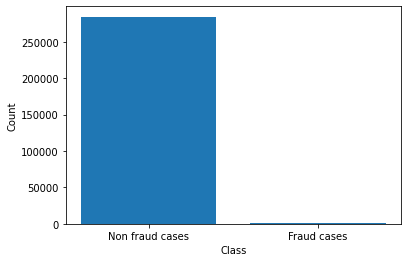

In [20]:
cases=len(data)
non_fraud_cases=len(data[data.Class==0])
fraud_cases=len(data[data.Class==1])
print("No. of total cases " , cases)
print("Non fraud cases in the dataset = " , non_fraud_cases)
print("Fraud cases in the dataset = " , fraud_cases)
fraud_percentage= fraud_cases/non_fraud_cases*100
print("Fraud % = ", fraud_percentage)
x=['Non fraud cases' , 'Fraud cases']
y=[non_fraud_cases , fraud_cases]
plt.bar(x,y)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Wrt to fraud cases class

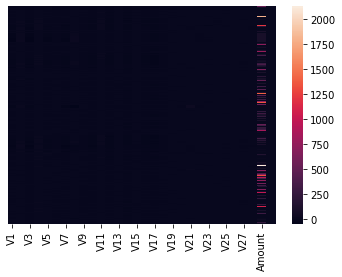

In [21]:
sns.heatmap((data[data.Class==1]),yticklabels=False,cbar=True)

Correlation matrix

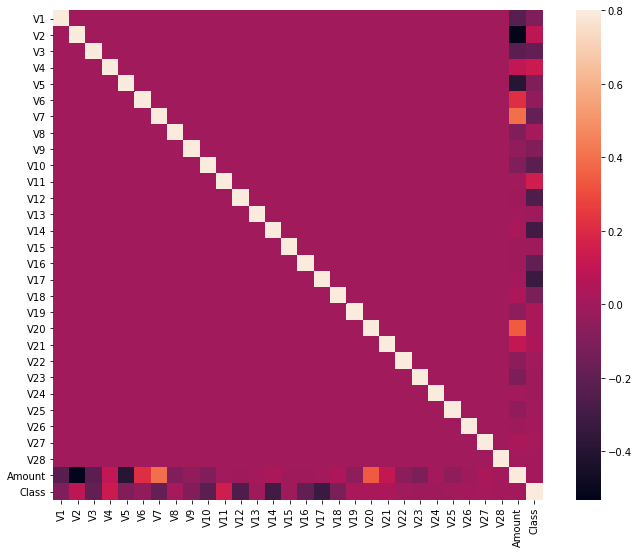

In [22]:
matrix = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(matrix , vmax = .8, square = True)
plt.show()

In [ ]:
sns.pairplot(data.head())

In [23]:
fraud_cases1=data[data.Class==1]
non_fraud_cases1=data[data.Class==0]
print("Amt of fraud cases " )
print(fraud_cases1.Amount.describe())
print("Amt of Non-fraud cases " )
print(non_fraud_cases1.Amount.describe())

Amt of fraud cases 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Amt of Non-fraud cases 
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Note fraud cases amount mean is much higher than nonfraud..

In [24]:
print((data['Amount'].describe()))

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [25]:
print((data['Amount'].head(10)))

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
5      3.67
6      4.99
7     40.80
8     93.20
9      3.68
Name: Amount, dtype: float64


In [26]:
sc = StandardScaler()
amount = data['Amount'].values
 
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
 
print((data['Amount'].describe()))
print((data['Amount'].head(10)))

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64
0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


DATA SPLIT

In [27]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#X=data.iloc[:,data.columns!='Class']
#y=data.iloc[:]

In [28]:
X_train.shape

(227845, 29)

In [29]:
X_test.shape

(56962, 29)

Logistic regression

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [31]:
print(lr_pred)

[0 0 0 ... 0 0 0]


In [38]:
import csv
with open("/content/drive/MyDrive/pred.csv",'w',newline="") as outFile:
  
  writer=csv.writer(outFile)
  features=[]
  features.append(lr_pred)
  writer.writerow(features)

In [36]:
print(accuracy_score(y_test,lr_pred))
print(f1_score(y_test,lr_pred))
from sklearn import metrics 
print('MAE', metrics.mean_absolute_error(y_test,lr_pred))
print("MSE", metrics.mean_squared_error(y_test,lr_pred))

0.9991924440855307
0.7356321839080459
MAE 0.0008075559144692953
MSE 0.0008075559144692953


In [39]:
print(y_test)

[0 0 0 ... 0 0 0]


In [42]:
DF = pd.DataFrame(y_test)
DF.to_csv("/content/drive/MyDrive/actual_test_data.csv")

In [44]:
testdata=pd.read_csv("/content/drive/MyDrive/Credit card fraud /actual_test_data - actual_test_data.csv")

In [45]:
testdata.describe()

,Sr. no.,Class
count,56962.000000,56962.000000
mean,28480.500000,0.001773
std,16443.657354,0.042071
min,0.000000,0.000000
25%,14240.250000,0.000000
50%,28480.500000,0.000000
75%,42720.750000,0.000000
max,56961.000000,1.000000


In [46]:
testdata.head

<bound method NDFrame.head of        Sr. no.  Class
0            0      0
1            1      0
2            2      0
3            3      0
4            4      0
...        ...    ...
56957    56957      0
56958    56958      0
56959    56959      0
56960    56960      0
56961    56961      0

[56962 rows x 2 columns]>

In [48]:
DF = pd.DataFrame(lr_pred)
DF.to_csv("/content/drive/MyDrive/prediction.csv")

In [50]:
predictiondata=pd.read_csv("/content/drive/MyDrive/Credit card fraud /prediction - prediction.csv")

In [51]:
predictiondata.describe()

,Sr. no.,Class
count,56962.000000,56962.000000
mean,28480.500000,0.001282
std,16443.657354,0.035776
min,0.000000,0.000000
25%,14240.250000,0.000000
50%,28480.500000,0.000000
75%,42720.750000,0.000000
max,56961.000000,1.000000


In [52]:
predictiondata.head

<bound method NDFrame.head of        Sr. no.  Class
0            0      0
1            1      0
2            2      0
3            3      0
4            4      0
...        ...    ...
56957    56957      0
56958    56958      0
56959    56959      0
56960    56960      0
56961    56961      0

[56962 rows x 2 columns]>

In [53]:
Actual_fraud_Cases=len(testdata[testdata.Class==1])
print("Actual test fraud data given in 56962 rows of data : " ,Actual_fraud_Cases)
print(testdata[testdata.Class==1].describe())

Actual test fraud data given in 56962 rows of data :  101
            Sr. no.  Class
count    101.000000  101.0
mean   27145.594059    1.0
std    16631.302256    0.0
min      365.000000    1.0
25%    10291.000000    1.0
50%    24643.000000    1.0
75%    43359.000000    1.0
max    56539.000000    1.0


In [54]:
predicted_fraud=len(predictiondata[predictiondata.Class==1])
print("Fraud cases predicted by model in 56962 rows of data : " ,predicted_fraud)
print(predictiondata[predictiondata.Class==1].describe())

Fraud cases predicted by model in 56962 rows of data :  73
            Sr. no.  Class
count     73.000000   73.0
mean   27565.589041    1.0
std    15802.529411    0.0
min     3037.000000    1.0
25%    13384.000000    1.0
50%    23387.000000    1.0
75%    42622.000000    1.0
max    54634.000000    1.0


Decision tree

In [55]:
Dtree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
Dtree_model.fit(X_train, y_train)
tree_pred = Dtree_model.predict(X_test)

In [56]:
print(accuracy_score(y_test,tree_pred))
print(f1_score(y_test,tree_pred))

0.9993679997191109
0.8105263157894738


In [57]:
from sklearn import metrics 
print('MAE', metrics.mean_absolute_error(y_test,lr_pred))
print("MSE", metrics.mean_squared_error(y_test,lr_pred))

MAE 0.0008075559144692953
MSE 0.0008075559144692953


In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
random_forest=RandomForestClassifier(n_estimators=100)

In [60]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
yRFC_pred=random_forest.predict(X_test)

In [62]:
print(accuracy_score(y_test,yRFC_pred))
print(f1_score(y_test,yRFC_pred))

0.9994733330992591
0.8387096774193548
